- Simple Gradient descent method  (경사하강법)

$x_{k+1}  ⃖ x_{k}-αf'(x_{k})$

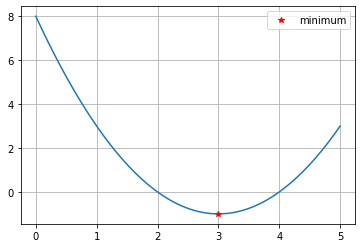

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0,5)
y = (x-2)*(x-4)

plt.plot(x,y)
plt.plot(3,-1,'r*',label='minimum')
plt.grid()
plt.legend()

2.9818601472 -0.9996709457403943


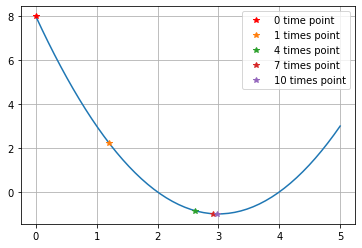

In [ ]:
def func(x):
  return (x-2)*(x-4)

def grad(x):
  return 2*x-6


x_init = 0
y_init = func(x_init)

plt.plot(x,y)
plt.plot(x_init,y_init,'r*',label='0 time point')
for ep in range(10):
  x_init -= 0.2*grad(x_init)  #경사강하법 공식 (0.2 = alpha)
  if ep % 3 == 0:
    plt.plot(x_init,func(x_init),'*',label='{:d} times point'.format(ep+1))
print(x_init,func(x_init))
plt.grid()
plt.legend()    

- Learning rate effect (학습률)

0.40625753990000035 5.7274999493255985


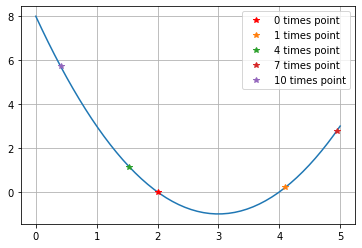

In [ ]:
x_init = 2
y_init = func(x_init)

plt.plot(x,y)
plt.plot(x_init,y_init,'r*',label='0 times point')
for ep in range(10):
  x_init -= 1.05 * grad(x_init) #과도한 학습률
  if ep % 3 == 0:
    plt.plot(x_init,func(x_init),'*',label='{:d} times point'.format(ep+1))
print(x_init,func(x_init))
plt.legend()
plt.grid()

_ Local minima (국부 최소지점)

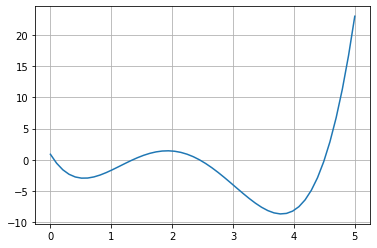

In [ ]:
def func(x):
  return (x-2.45)*(x-0.06)*(x-1.35)*(x-4.5)

y = func(x)
plt.plot(x,y)
plt.grid()

In [ ]:
# local minima

def grad(x):
  return (func(x+1e-10)-func(x))/1e-10
  

0.5057099405902932 -2.922433593094443


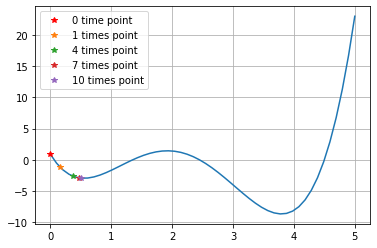

In [ ]:
x_init = 0
y_init = func(x_init)

plt.plot(x,y)
plt.plot(x_init,func(x_init),'r*',label='0 time point')
for ep in range(10):
  x_init -= 0.01*grad(x_init)
  if ep % 3 == 0:
    plt.plot(x_init,func(x_init),'*',label='{:d} times point'.format(ep+1))
print(x_init,func(x_init))
plt.legend()
plt.grid()

3.7956385005816173 -8.65926676457058


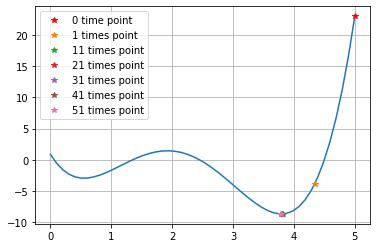

In [ ]:
x_init = 5
y_init = func(x_init)

plt.plot(x,y)
plt.plot(x_init,func(x_init),'r*',label='0 time point')
for ep in range(60):
  x_init -= 0.01*grad(x_init)
  if ep % 10 == 0:
    plt.plot(x_init,func(x_init),'*',label='{:d} times point'.format(ep+1))
print(x_init,func(x_init))
plt.legend()
plt.grid()

- Multi-variable Gradient descent

Review. 단일변수 Gradient descent

$ x ⃖x-\frac{f'(x)}{f''(x)} $

다변수함수에서 Gradient descent???

반드시 알아야해요! 딥러닝의 학습대상이 다변수함수!

$ X= \begin{bmatrix} 
x1 \\
x2 \\
\vdots 
\end{bmatrix} $

$X  ⃖ X -  α Σ F'(X)$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x1 = np.linspace(-3,3)
x2 = np.linspace(-3,3)
X1,X2 = np.meshgrid(x1,x2)

def test_func(X1,X2):
  return X1**2+X2**2

def grad_test(X1,X2):
  return 2*X1+2*X2


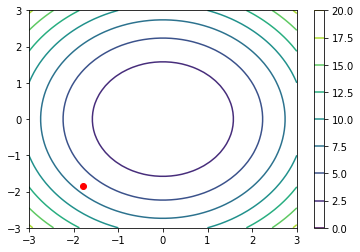

In [ ]:
X = [-1.78,-1.85]
x1,x2=X
Z = test_func(X1,X2)
plt.contour(X1,X2,Z) #등고선그래프
plt.plot(x1,x2,'ro')
plt.colorbar()

In [ ]:
ans_buff = []
for iter in range(10):
  ans_buff.append(X)
  X = X-0.2*np.mean(grad_test(X[0],X[1]))  #평균

[[-1.78       -1.85      ]
 [-0.328      -0.398     ]
 [-0.0376     -0.1076    ]
 [ 0.02048    -0.04952   ]
 [ 0.032096   -0.037904  ]
 [ 0.0344192  -0.0355808 ]
 [ 0.03488384 -0.03511616]
 [ 0.03497677 -0.03502323]
 [ 0.03499535 -0.03500465]
 [ 0.03499907 -0.03500093]]


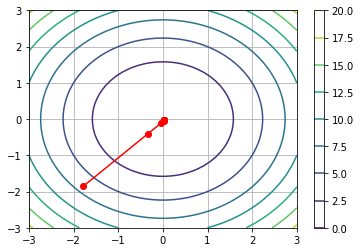

In [ ]:
ans_buff = np.array(ans_buff)
plt.contour(X1,X2,Z)
plt.plot(ans_buff[:,0],ans_buff[:,1],'ro-')
plt.colorbar()
print(ans_buff)
plt.grid()


In [ ]:
print(ans_buff[-1])

[ 0.03499907 -0.03500093]
